# Part A

In [178]:
from pandas import Series, DataFrame
import pandas as pd
import nltk
import operator
import re,string
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?

### (1) import file

In [180]:
train = pd.read_csv('/Users/leeanthea/Documents/Train_rev1.csv')

train[:3]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk


### (2) tokenize the corpus

In [195]:
description  = train['FullDescription']

corpus = description.str.cat(sep=' ')

corpus = corpus.replace('****','')

corpus = corpus.decode('utf-8')

corpus_words = nltk.word_tokenize(corpus.lower())

### (3) Calculate the frequencies of PoS

In [199]:
fdist = nltk.FreqDist(corpus_words)

FreqDist({u'and': 2633141, u',': 2312149, u'.': 2109851, u'the': 2074520, u'to': 2012350, u'a': 1506748, u'of': 1421757, u'in': 1028239, u'for': 864285, u'with': 727458, ...})

In [200]:
c_sorted = sorted(fdist.items(), key=operator.itemgetter(1),reverse=True)

df = pd.DataFrame.from_records(c_sorted)
df.columns = ['word','freq']
df[:10]

,word,freq
0,and,2633141
1,",",2312149
2,.,2109851
3,the,2074520
4,to,2012350
5,a,1506748
6,of,1421757
7,in,1028239
8,for,864285
9,with,727458


### (4) Get rid of the punctuation marks and then rank 

In [201]:
mask = ~df['word'].isin(set(string.punctuation)) 

df = df[mask]

df['rank'] = df['freq'].rank(method='min',ascending=False)

In [212]:
df[:5][['word','freq','rank']]

,word,freq,rank
0,and,2633141,1
3,the,2074520,2
4,to,2012350,3
5,a,1506748,4
6,of,1421757,5


## A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law.

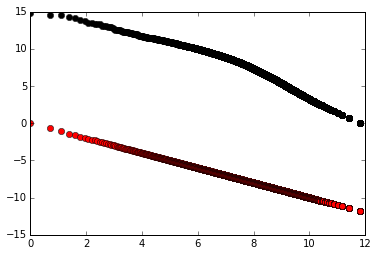

In [203]:
df['x^-1']= [c**-1 for c in df['rank']]

import matplotlib.pyplot as plt

fig = plt.figure()

ax = plt.plot([math.log(c) for c in df['rank'].values], [math.log(c) for c in df['freq']], 'ro',color='black')

ax2 = plt.plot([math.log(c) for c in df['rank'].values], [math.log(c) for c in df['x^-1']], 'ro')

## A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What is their frequency?

### (1) Lemmatize the corpus

In [204]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

#port = PorterStemmer()
#corpus_stem = " ".join([port.stem(i) for i in corpus.lower().split()])

wnl = WordNetLemmatizer()
corpus_lem = " ".join([wnl.lemmatize(i) for i in corpus.lower().split()])

lem_words = nltk.tokenize.word_tokenize(corpus_lem)
lem_words = (x for x in lem_words if x not in set(string.punctuation))

### (2) Remove stop words

In [205]:
from nltk.corpus import stopwords

filtered_words = [word for word in lem_words if word not in stopwords.words('english')]

fdist_2 = nltk.FreqDist(filtered_words)
fdist_2.most_common(10)

[(u'work', 520420),
 (u'thi', 491213),
 (u'manag', 429547),
 (u'experi', 369923),
 (u'role', 306558),
 (u'develop', 294871),
 (u'team', 290716),
 (u'client', 259019),
 (u'busi', 252636),
 (u'within', 217268)]